# Multi-Layer Perceptron (MLP)
A **multi-layer perceptron (MLP)** is a neural network that has at least three layers: 
1. Input layer
2. Hidden layer
3. Output layer
Each layer operates on the outputs of its preceding layer:

<div style="align:center">
    <img src="media/mlp.png" width="700">
</div>

We will use the following notations:
- $a_i^{l}$ is the activation (output) of neuron $i$ in layer $l$
- $w_{ij}^{l}$ is the weight of the connection from neuron $j$ in layer $l-1$ to neuron $i$ in layer $l$
- $b_i^{l}$ is the bias term of neuron $i$ in layer $l$

The intermediate layers between the input and the output are called **hidden layers** since they are not visible outside of the network (they form the "internal brain" of the network).

The input layer is typically not counted in the number of layers in the network. For example, a 3-layer network has one input layer, two hidden layers, and an output layer.

## Forward Propagation
**Forward propagation** is the process where the input data is fed through the network in a forward direction, layer-by-layer, until it generates the output. The activations of the neurons during the forward propagation phase are computed similar to how the activation of a single perceptron is computed. For example, let’s look at neuron $i$ in layer $l$. The activation of this neuron is computed in two steps:

1. We first compute the net input of the neuron as the weighted sum of its incoming inputs plus its bias:

$$z_i^{l} = \sum_{j} w_{ij}^l a_j^{l-1} + b_i^{l}$$

2. We now apply the activation function to the net input to get the neuron's activation:

$$a_i^{l} = f(z_i^{l}) = f(\sum_{j} w_{ij}^l a_j^{l-1} + b_i^{l})$$

By definition, the activations of the neurons in the input layer are equal to the feature values of the example currently presented to the network, i.e.,

$$a_i^{0} = x_i, \quad 1 \leq i \leq m$$

where $m$ is the number of features in the data set.

## Vectorized Form
To make the computations more efficient (especially when using numerical libraries like `NumPy`), we typically use the vectorized form of the above equations. We first define the vector $a^{l-1}$ as the vector containing the activations of all the neurons in layer $l - 1$, and the vector $b^l$ as the vector with the biases of all the neurons in layer $l$. We also define $w^l$ as the matrix of connection weights from all the neurons in layer $l - 1$ to all the neurons in layer $l$. For example, $W_{23}^1$ is the weight of the connection between neuron no. $2$ in layer $0$ (the input layer) and neuron no. $3$ in layer $1$ (the first hidden layer).

We can now write the forward propagation equations in vector form. For each layer $l$ we compute:

$$z^l = W^l a^{l-1} + b^l$$

$$a^l = f(z^l)$$

## The Universal Approximation Theorem
One of the remarkable facts about MLPs is that they can compute any arbitrary function (even though each neuron in the network computes a very simple function such as the step function). The **universal approximation theorem** states that an MLP with one hidden layer (with a sufficient number of neurons) can approximate any continuous function of the inputs arbitrarily well. With two hidden layers, it can even approximate discontinuous functions. This means that even very simple network architectures can be extremely powerful.

Unfortunately, the proof of the theorem is non-constructive, i.e., it does not tell us how to build a network to compute a specific function but only shows that such a network exists.

## MLPs in Scikit-Learn
Scikit-Learn provides two classes that implement MLPs in the `sklearn.neural_network` module:
1. **MLPClassifier** is used for classification problems.
2. **MLPRegressor** is used for regression problems.

### Training an MLP on MNIST
Let’s train an MLP on the MNIST data set, which is a widely used data set for image classification tasks.

The data set contains $60,000$ training images and $10,000$ testing images of handwritten digits. Each image is $28 × 28$ pixels in size, and is typically represented by a vector of $784$ numbers in the range $[0, 255]$. The task is to classify these images into one of the ten digits $(0–9).$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto', as_frame=False)
print(X.shape)

(70000, 784)


The `as_frame` parameter specifies that we want to get the data and the labels as `NumPy` arrays instead of `DataFrames` (the default of this parameter has changed in Scikit-Learn 0.24 from `False` to `auto`).

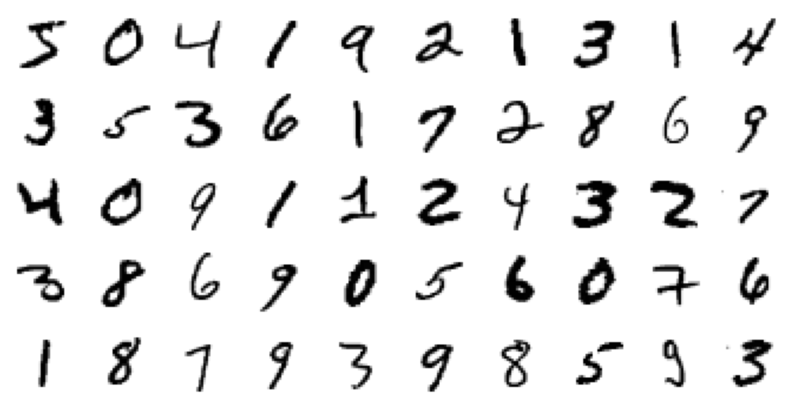

In [4]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
i = 0
for ax in axes.flat:
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')    
    i += 1

In [5]:
# Let’s check how many samples we have from each digit
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [6]:
# We now scale the inputs to be within the range [0, 1] instead of [0, 255]
X = X / 255

Feature scaling makes the training of neural networks faster and prevents them from getting stuck in local optima.

We now split the data into training and test sets. Note that the first 60,000 images in MNIST are already designated for training, so we can just use simple slicing for the split:

In [7]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

We now create an MLP classifier with a single hidden layer with 300 neurons. We will keep all the other hyperparameters with their default values, except for `early_stopping` which we will change to `True.` We will also set `verbose=True` in order to track the progress of the training:

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(300,), early_stopping=True, verbose=True)

In [9]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.35401793
Validation score: 0.943333
Iteration 2, loss = 0.15401268
Validation score: 0.958833
Iteration 3, loss = 0.10719257
Validation score: 0.966667
Iteration 4, loss = 0.08099722
Validation score: 0.971667
Iteration 5, loss = 0.06310824
Validation score: 0.975167
Iteration 6, loss = 0.05101329
Validation score: 0.975333
Iteration 7, loss = 0.04082589
Validation score: 0.978667
Iteration 8, loss = 0.03309188
Validation score: 0.977833
Iteration 9, loss = 0.02742505
Validation score: 0.979500
Iteration 10, loss = 0.02138747
Validation score: 0.976000
Iteration 11, loss = 0.01856808
Validation score: 0.979167
Iteration 12, loss = 0.01514220
Validation score: 0.978833
Iteration 13, loss = 0.01222672
Validation score: 0.979167
Iteration 14, loss = 0.01064820
Validation score: 0.982000
Iteration 15, loss = 0.00811662
Validation score: 0.981000
Iteration 16, loss = 0.00790414
Validation score: 0.980333
Iteration 17, loss = 0.00580619
Validation score: 0.982167
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(300,), verbose=True)

In [10]:
print('Accuracy on training set:', mlp.score(X_train, y_train))
print('Accuracy on test set:', mlp.score(X_test, y_test))

Accuracy on training set: 0.9982333333333333
Accuracy on test set: 0.9802


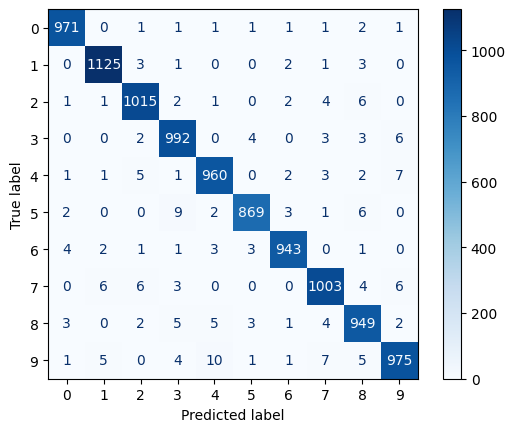

In [11]:
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues')

We can see that the main confusions of the model are between the digits $4 \leftrightarrow 9$, $7 \leftrightarrow 9$ and $2 \leftrightarrow 8$. This makes sense since these digits often resemble each other when written by hand. To help our model distinguish between these digits, we can add more examples from these digits (e.g., by using data augmentation) or extract additional features from the images (e.g., the number of closed loops in the digit).

## Visualizing the MLP Weights
We can plot the weights between the input and the hidden layers of our MLP classifier. The weight matrix has a shape of $(784, 300)$, and is stored in a variable called `mlp.coefs_[0]`.

In [12]:
print(mlp.coefs_[0].shape)

(784, 300)


Column $i$ of this matrix represents the weights of the incoming inputs to hidden neuron $i$. We can display this column as a $28 \times 28$ pixel image, in order to examine which input neurons have a stronger influence on this neuron’s activation.

The following plot displays the weights of the first 20 hidden neurons:

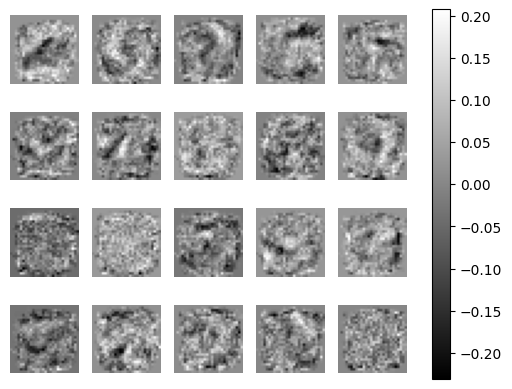

In [19]:
fig, axes = plt.subplots(4, 5)

for coef, ax in zip(mlp.coefs_[0].T, axes.flat):
    im = ax.imshow(coef.reshape(28, 28), cmap='gray')
    ax.axis('off')
    
fig.colorbar(im, ax=axes.flat)